<a href="https://colab.research.google.com/github/ACBRrobotics/MTREbot/blob/main/Copy_of_gesture_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gesture Recognizer with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to recognize hand gestures in images.

## Preparation

Let's start with installing MediaPipe.

In [7]:
!pip install -q mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.16.1 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.5 which is incompatible.


Then download an off-the-shelf model. This model can recognize 7 hand gestures: 👍, 👎, ✌️, ☝️, ✊, 👋, 🤟

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/gesture_recognizer#models) for more details about the model.

In [8]:
!wget -q https://storage.googleapis.com/mediapipe-models/gesture_recognizer/gesture_recognizer/float16/1/gesture_recognizer.task

## Visualization Utilities

In [9]:
#@markdown We implemented some functions to visualize the gesture recognition results. <br/> Run the following cell to activate the functions.
from matplotlib import pyplot as plt
import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2

plt.rcParams.update({
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'xtick.labelbottom': False,
    'xtick.bottom': False,
    'ytick.labelleft': False,
    'ytick.left': False,
    'xtick.labeltop': False,
    'xtick.top': False,
    'ytick.labelright': False,
    'ytick.right': False
})

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles


def display_one_image(image, title, subplot, titlesize=16):
    """Displays one image along with the predicted category name and score."""
    plt.subplot(*subplot)
    plt.imshow(image)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize), color='black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)


def display_batch_of_images_with_gestures_and_hand_landmarks(images, results):
    """Displays a batch of images with the gesture category and its score along with the hand landmarks."""
    # Images and labels.
    images = [image.numpy_view() for image in images]
    gestures = [top_gesture for (top_gesture, _) in results]
    multi_hand_landmarks_list = [multi_hand_landmarks for (_, multi_hand_landmarks) in results]

    # Auto-squaring: this will drop data that does not fit into square or square-ish rectangle.
    rows = int(math.sqrt(len(images)))
    cols = len(images) // rows

    # Size and spacing.
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols, 1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))

    # Display gestures and hand landmarks.
    for i, (image, gestures) in enumerate(zip(images[:rows*cols], gestures[:rows*cols])):
        title = f"{gestures.category_name} ({gestures.score:.2f})"
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols) * 40 + 3
        annotated_image = image.copy()

        for hand_landmarks in multi_hand_landmarks_list[i]:
          hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
          hand_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
          ])

          mp_drawing.draw_landmarks(
            annotated_image,
            hand_landmarks_proto,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

        subplot = display_one_image(annotated_image, title, subplot, titlesize=dynamic_titlesize)

    # Layout.
    plt.tight_layout()
    plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()

## Download test images

Let's grab some test images that we'll use later. The images ([1](https://pixabay.com/photos/idea-pointing-raise-hand-raise-3082824/), [2](https://pixabay.com/photos/thumbs-up-happy-positive-woman-2649310/), [3](https://pixabay.com/photos/epidemic-disease-coronavirus-5082474/), [4](https://pixabay.com/photos/thumbs-down-disapprove-gesture-6744094/)) are from Pixabay.

In [ ]:
import urllib

IMAGE_FILENAMES = ['thumbs_down.jpg', 'victory.jpg', 'thumbs_up.jpg', 'pointing_up.jpg']

for name in IMAGE_FILENAMES:
  url = f'https://storage.googleapis.com/mediapipe-tasks/gesture_recognizer/{name}'
  urllib.request.urlretrieve(url, name)

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [4]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded:
   content = uploaded[filename]
   with open(filename, 'wb') as f:
     f.write(content)
IMAGE_FILENAMES = list(uploaded.keys())

print('Uploaded files:', IMAGE_FILENAMES)

Saving WIN_20241026_10_01_14_Pro.jpg to WIN_20241026_10_01_14_Pro.jpg
Saving WIN_20241026_10_01_16_Pro.jpg to WIN_20241026_10_01_16_Pro.jpg
Saving WIN_20241026_10_01_27_Pro.jpg to WIN_20241026_10_01_27_Pro.jpg
Saving WIN_20241026_10_01_31_Pro.jpg to WIN_20241026_10_01_31_Pro.jpg
Saving WIN_20241026_10_01_37_Pro.jpg to WIN_20241026_10_01_37_Pro.jpg
Uploaded files: ['WIN_20241026_10_01_14_Pro.jpg', 'WIN_20241026_10_01_16_Pro.jpg', 'WIN_20241026_10_01_27_Pro.jpg', 'WIN_20241026_10_01_31_Pro.jpg', 'WIN_20241026_10_01_37_Pro.jpg']


Then let's check out the images.

WIN_20241026_10_01_14_Pro.jpg


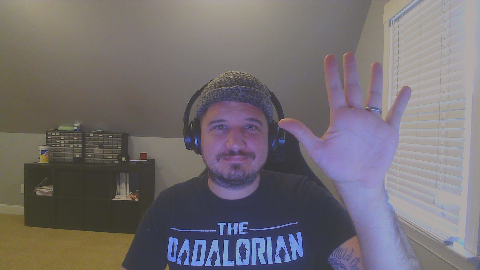

WIN_20241026_10_01_16_Pro.jpg


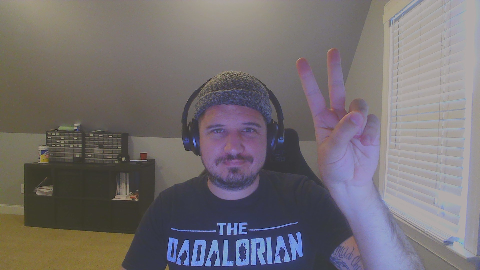

WIN_20241026_10_01_27_Pro.jpg


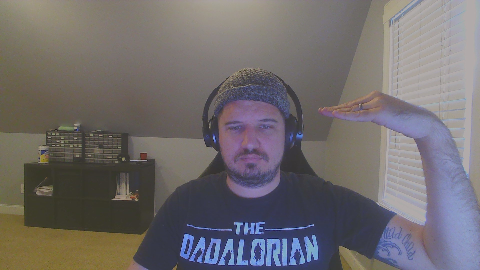

WIN_20241026_10_01_31_Pro.jpg


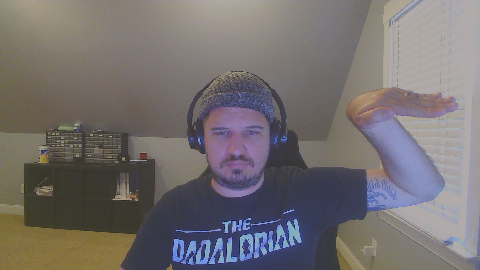

WIN_20241026_10_01_37_Pro.jpg


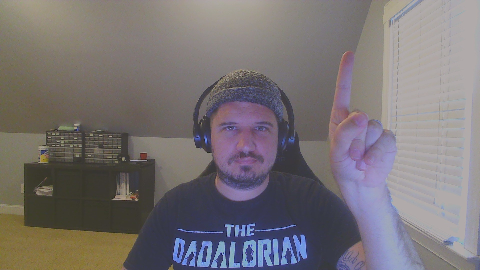

In [15]:
import cv2

from google.colab.patches import cv2_imshow
import math

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)


# Preview the images.
images = {name: cv2.imread(name) for name in IMAGE_FILENAMES}
for name, image in images.items():
  print(name)
  resize_and_show(image)

## Running inference and visualizing the results

Here are the steps to run gesture recognizer using MediaPipe.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/gesture_recognizer/python) to learn more about configuration options that this solution supports.

*Note: Gesture Recognizer also returns the hand landmark it detects from the image, together with other useful information such as whether the hand(s) detected are left hand or right hand.*

In [17]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create a GestureRecognizer object.
base_options = python.BaseOptions(model_asset_path='gesture_recognizer.task')
options = vision.GestureRecognizerOptions(base_options=base_options)
recognizer = vision.GestureRecognizer.create_from_options(options)

# Helper function to detect if the hand is "flat"
def is_flat_hand(landmarks):
    # Check if we have enough landmarks
    if len(landmarks) < 18:
        return False  # Not enough landmarks to check for "flat"

    # Stricter proximity threshold
    proximity_threshold = 0.01
    z_threshold = 0.005  # Stricter depth threshold for alignment

    # We only compare key points for a side profile
    key_points = [landmarks[0], landmarks[5], landmarks[9], landmarks[13], landmarks[17]]  # Wrist, MCP joints

    # Check if these key landmarks are clustered
    for i in range(1, len(key_points)):
        dx = abs(key_points[0].x - key_points[i].x)
        dy = abs(key_points[0].y - key_points[i].y)
        dz = abs(key_points[0].z - key_points[i].z)

        if dx > proximity_threshold or dy > proximity_threshold or dz > z_threshold:
            return False
    return True

images = []
results = []
for image_file_name in IMAGE_FILENAMES:
    # STEP 3: Load the input image.
    image = mp.Image.create_from_file(image_file_name)

    # STEP 4: Recognize gestures in the input image.
    recognition_result = recognizer.recognize(image)
    top_gesture = recognition_result.gestures[0][0]
    hand_landmarks = recognition_result.hand_landmarks

    # Only check for "flat" if the gesture confidence is below a threshold (e.g., 0.8)
    if top_gesture.score < 0.8 and is_flat_hand(hand_landmarks):
        # If the hand is "flat", create a mock gesture with 'category_name' and 'score'
        flat_gesture = type('Gesture', (object,), {'category_name': 'flat', 'score': 1.0})
        top_gesture = flat_gesture  # Assign our custom gesture object

    results.append((top_gesture, hand_landmarks))

# STEP 7: Display the images with the recognized gestures
if images:  # Check if there are any images to display
    display_batch_of_images_with_gestures_and_hand_landmarks(images, results)
else:
    print("No images were loaded or processed, so nothing to display.")



No images were loaded or processed, so nothing to display.
